<a href="https://colab.research.google.com/github/Martin2-kioko/33Martin22/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install seaborn
!pip install seaborn
!pip install statsmodels
!pip install keras
!pip install tensorflow

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller #For stationarity test
from statsmodels.tsa.api import VAR #For vector Autoregression model
from sklearn.metrics import mean_squared_error  # For model evaluation
import seaborn as sns

In [ ]:
#loading the dataset
df=pd.read_csv("MVS.csv")

In [ ]:
df.head()

,Date,Open_M,High_M,Low_M,Close_M,Adj Close_M,Volume_M,Open_V,High_V,Low_V,Close_V,Adj Close_V,Volume_V
0,6/2/2008,30.926001,32.000000,30.257000,32.000000,29.529486,50620000,21.552500,21.737499,21.150000,21.517500,19.202324,36856000
1,6/3/2008,31.386999,31.399000,30.235001,30.740000,28.366755,93913000,21.752501,21.987499,21.507500,21.889999,19.534735,48411600
2,6/4/2008,30.745001,30.959999,29.454000,29.740000,27.443956,66160000,21.770000,22.025000,21.320000,21.370001,19.070698,40684400
3,6/5/2008,29.951000,30.615999,29.544001,30.615999,28.252338,45959000,21.615000,21.809999,21.397499,21.809999,19.463354,27059600
4,6/6/2008,30.228001,30.242001,29.481001,29.573000,27.289856,29383000,21.475000,21.497499,20.887501,20.912500,18.662413,41748000


In [ ]:
#
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4047 entries, 0 to 4046
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4047 non-null   object 
 1   Open_M       4047 non-null   float64
 2   High_M       4047 non-null   float64
 3   Low_M        4047 non-null   float64
 4   Close_M      4047 non-null   float64
 5   Adj Close_M  4047 non-null   float64
 6   Volume_M     4047 non-null   int64  
 7   Open_V       4047 non-null   float64
 8   High_V       4047 non-null   float64
 9   Low_V        4047 non-null   float64
 10  Close_V      4047 non-null   float64
 11  Adj Close_V  4047 non-null   float64
 12  Volume_V     4047 non-null   int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 411.2+ KB


In [ ]:
 #chech for missing values
 df.isnull().sum()

,0
Date,0
Open_M,0
High_M,0
Low_M,0
Close_M,0
Adj Close_M,0
Volume_M,0
Open_V,0
High_V,0
Low_V,0


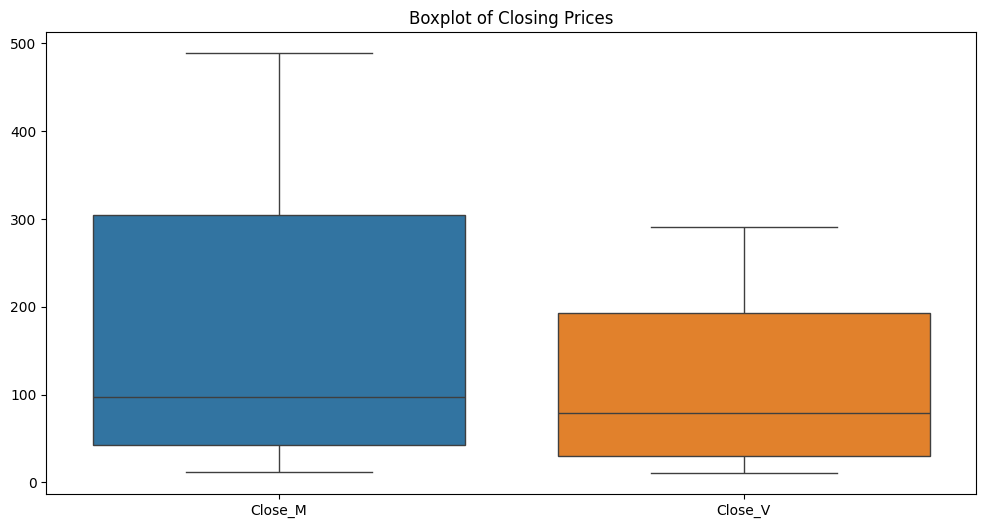

In [ ]:
# Check for outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Close_M', 'Close_V']])
plt.title('Boxplot of Closing Prices')
plt.show()

In [ ]:
df.describe()

,Open_M,High_M,Low_M,Close_M,Adj Close_M,Volume_M,Open_V,High_V,Low_V,Close_V,Adj Close_V,Volume_V
count,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4.047000e+03,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4.047000e+03
mean,164.535600,166.170139,162.857876,164.563858,160.646182,8.249296e+06,107.988356,108.965956,106.999128,108.003625,104.551613,1.386969e+07
std,138.620480,139.946015,137.248286,138.635551,138.057771,1.140882e+07,82.319225,83.020901,81.600647,82.319975,81.900950,1.469735e+07
min,12.100000,12.736000,11.305000,11.918000,11.024753,6.411000e+05,10.672500,11.047500,10.445000,10.605000,9.496159,1.640900e+06
25%,42.459502,42.865499,42.062000,42.452500,39.624086,2.988750e+06,30.157500,30.582501,29.888750,30.253750,27.724516,6.652450e+06
50%,97.440002,98.089996,96.699997,97.599998,92.752449,4.409000e+06,78.690002,79.349998,78.150002,78.620003,74.387733,9.420400e+06
75%,304.414994,306.979995,300.304993,303.910004,297.765701,8.251500e+06,193.044998,195.095001,190.185005,192.940002,187.882408,1.526840e+07
max,488.529999,490.000000,483.640015,488.640015,487.964142,1.787220e+08,290.000000,290.959991,287.899994,290.369995,289.833618,3.375336e+08


In [ ]:
#check for information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4047 entries, 0 to 4046
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4047 non-null   object 
 1   Open_M       4047 non-null   float64
 2   High_M       4047 non-null   float64
 3   Low_M        4047 non-null   float64
 4   Close_M      4047 non-null   float64
 5   Adj Close_M  4047 non-null   float64
 6   Volume_M     4047 non-null   int64  
 7   Open_V       4047 non-null   float64
 8   High_V       4047 non-null   float64
 9   Low_V        4047 non-null   float64
 10  Close_V      4047 non-null   float64
 11  Adj Close_V  4047 non-null   float64
 12  Volume_V     4047 non-null   int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 411.2+ KB


In [ ]:
#convert 'Date to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
print(df.dtypes)

Open_M         float64
High_M         float64
Low_M          float64
Close_M        float64
Adj Close_M    float64
Volume_M         int64
Open_V         float64
High_V         float64
Low_V          float64
Close_V        float64
Adj Close_V    float64
Volume_V         int64
dtype: object


**Time Series Visualization**

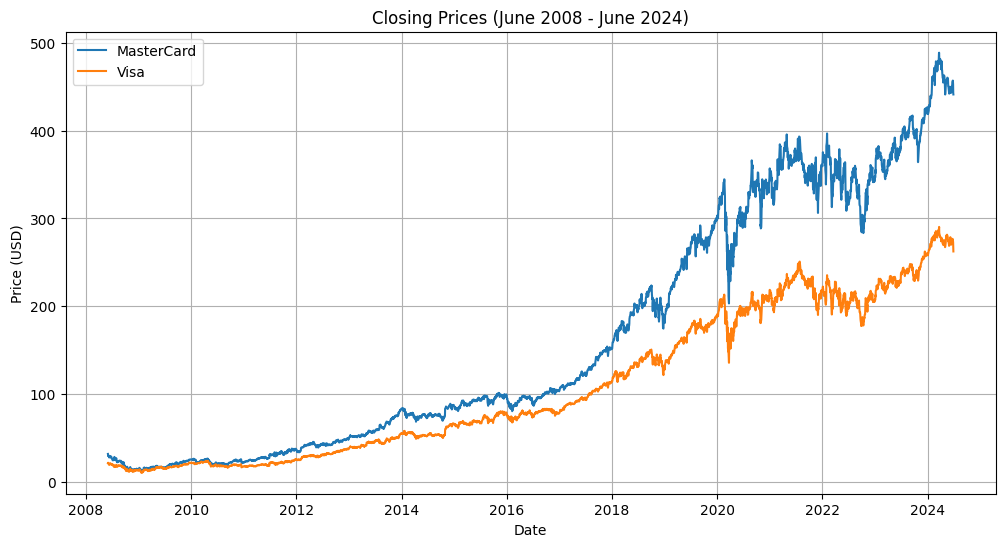

In [ ]:
# Plot Adjusted Close prices for MasterCard and Visa
plt.figure(figsize=(12, 6))
plt.plot(df['Close_M'], label='MasterCard')
# Assuming the correct column name is 'Adj Close' for Visa
plt.plot(df['Close_V'], label='Visa')
plt.title('Closing Prices (June 2008 - June 2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

insight

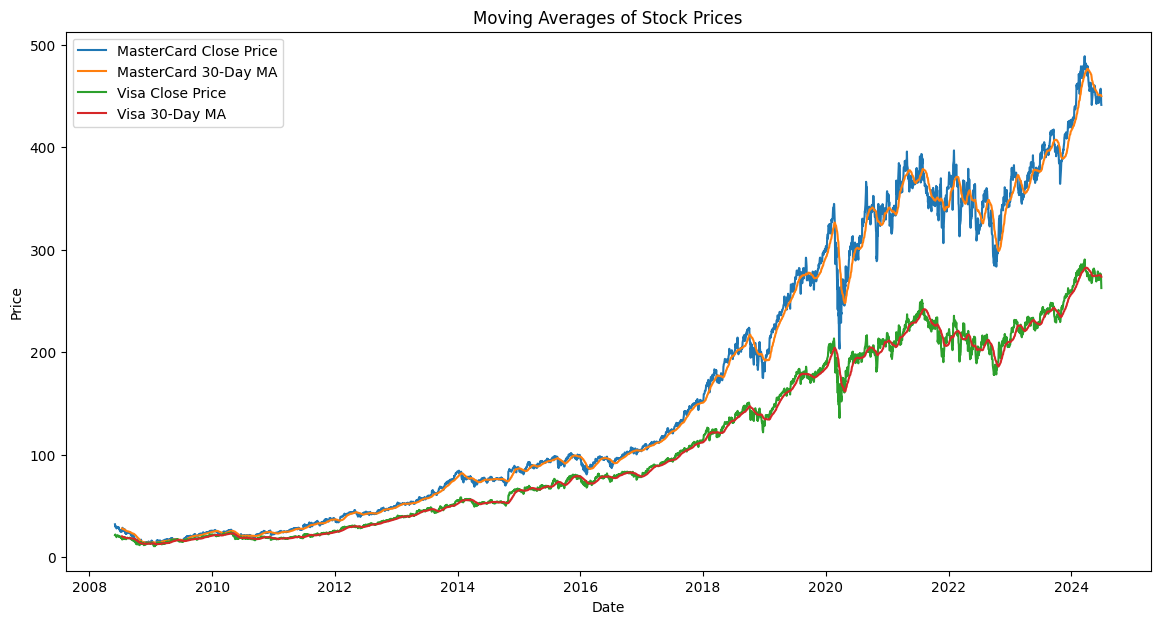

In [ ]:
# Calculate and plot moving averages
df['MA_Close_M'] = df['Close_M'].rolling(window=30).mean()
df['MA_Close_V'] = df['Close_V'].rolling(window=30).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['Close_M'], label='MasterCard Close Price')
plt.plot(df['MA_Close_M'], label='MasterCard 30-Day MA')
plt.plot(df['Close_V'], label='Visa Close Price')
plt.plot(df['MA_Close_V'], label='Visa 30-Day MA')
plt.title('Moving Averages of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

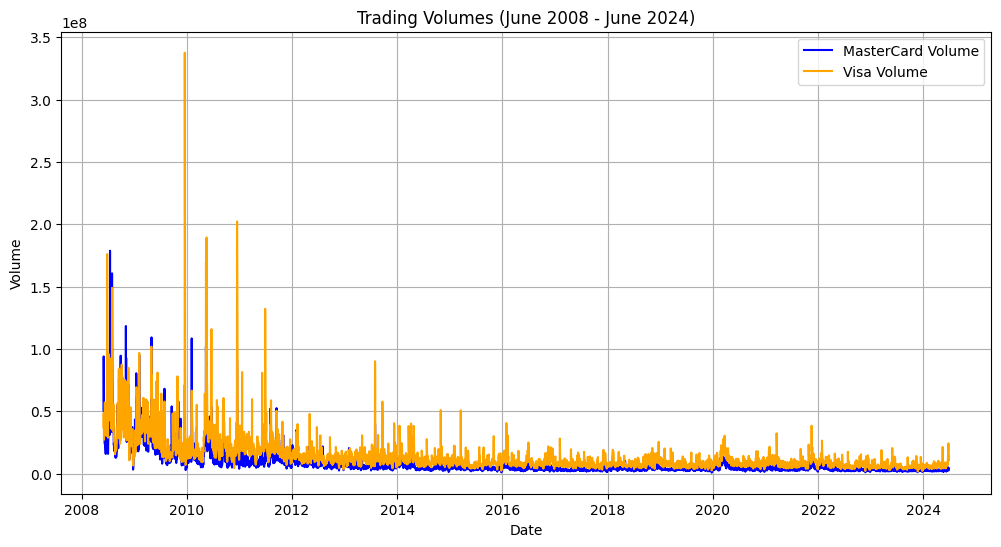

In [ ]:
# Plot trading volumes for MasterCard and Visa
plt.figure(figsize=(12, 6))
plt.plot(df['Volume_M'], label='MasterCard Volume', color='blue')
plt.plot(df['Volume_V'], label='Visa Volume', color='orange')
plt.title('Trading Volumes (June 2008 - June 2024)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

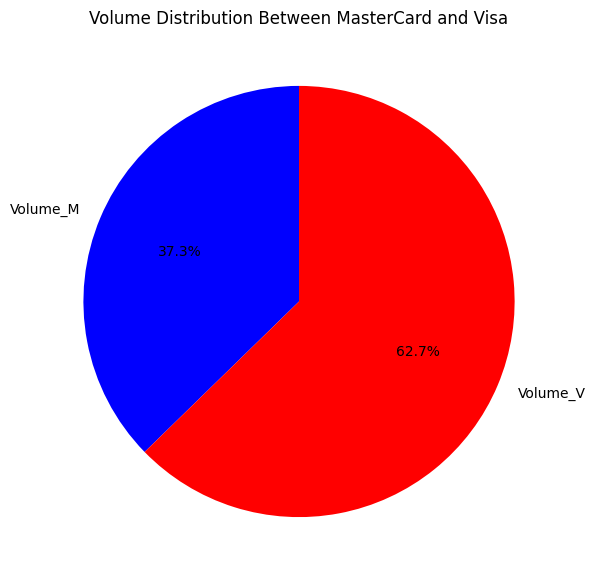

In [ ]:
plt.figure(figsize=(14, 7))
df['Total Volume'] = df['Volume_M'] + df['Volume_V']
df[['Volume_M', 'Volume_V']].sum().plot.pie(autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
plt.title('Volume Distribution Between MasterCard and Visa')
plt.ylabel('')
plt.show()

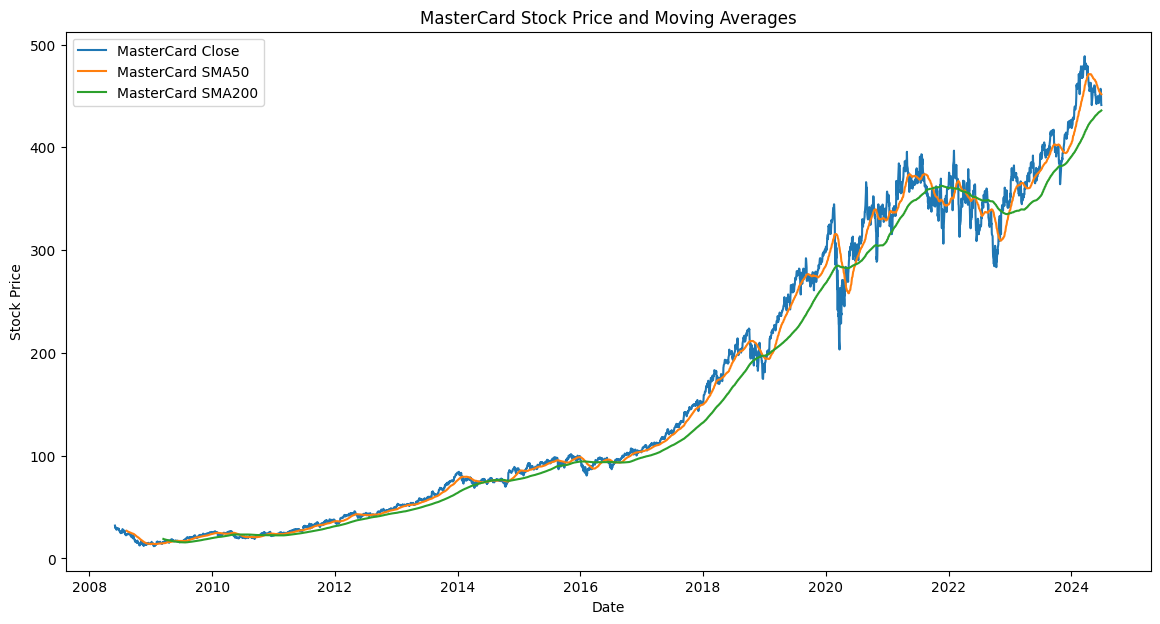

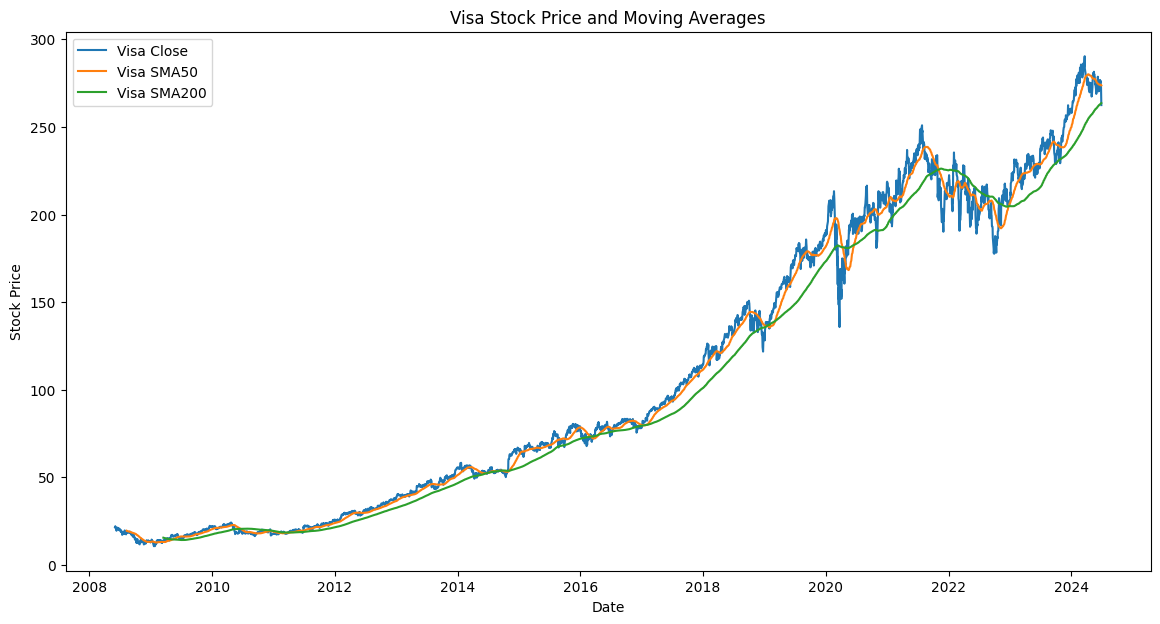

In [ ]:
# Calculate 50-day and 200-day Moving Averages for MasterCard
df['SMA50_M'] = df['Close_M'].rolling(window=50).mean()
df['SMA200_M'] = df['Close_M'].rolling(window=200).mean()

# Calculate 50-day and 200-day Moving Averages for Visa
df['SMA50_V'] = df['Close_V'].rolling(window=50).mean()
df['SMA200_V'] = df['Close_V'].rolling(window=200).mean()

# Plot the moving averages along with the stock prices
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close_M'], label='MasterCard Close')
plt.plot(df.index, df['SMA50_M'], label='MasterCard SMA50')
plt.plot(df.index, df['SMA200_M'], label='MasterCard SMA200')
plt.title('MasterCard Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close_V'], label='Visa Close')
plt.plot(df.index, df['SMA50_V'], label='Visa SMA50')
plt.plot(df.index, df['SMA200_V'], label='Visa SMA200')
plt.title('Visa Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Volatility Analysis

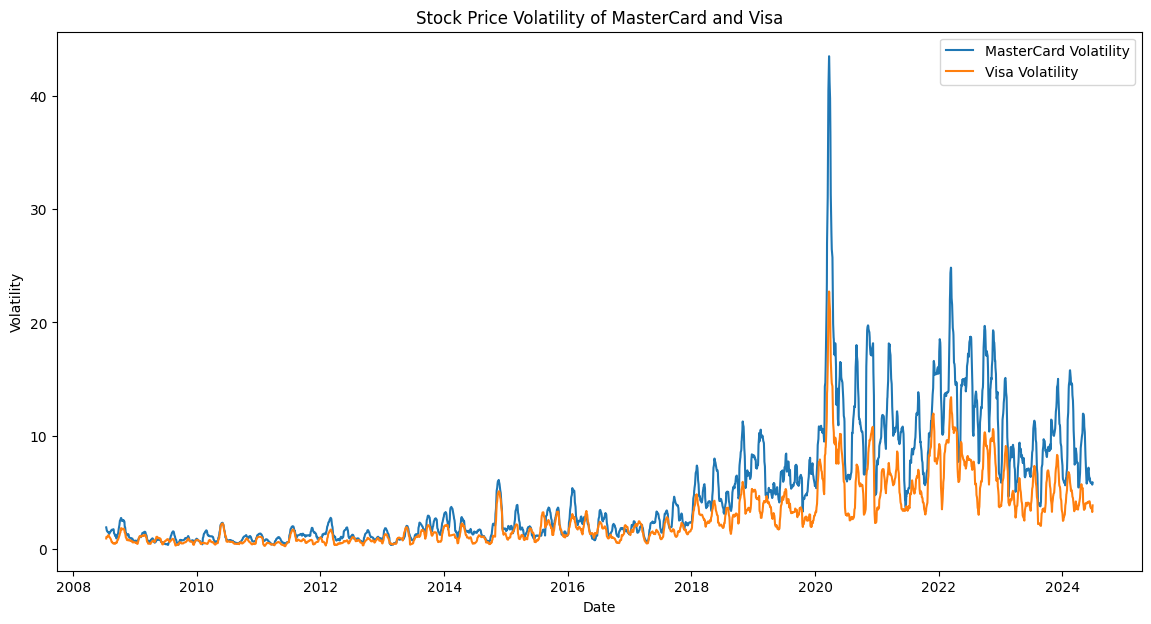

In [ ]:
# Calculate rolling standard deviation (volatility)
df['Volatility_M'] = df['Close_M'].rolling(window=30).std()
df['Volatility_V'] = df['Close_V'].rolling(window=30).std()

# Plot the volatility
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Volatility_M'], label='MasterCard Volatility')
plt.plot(df.index, df['Volatility_V'], label='Visa Volatility')
plt.title('Stock Price Volatility of MasterCard and Visa')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

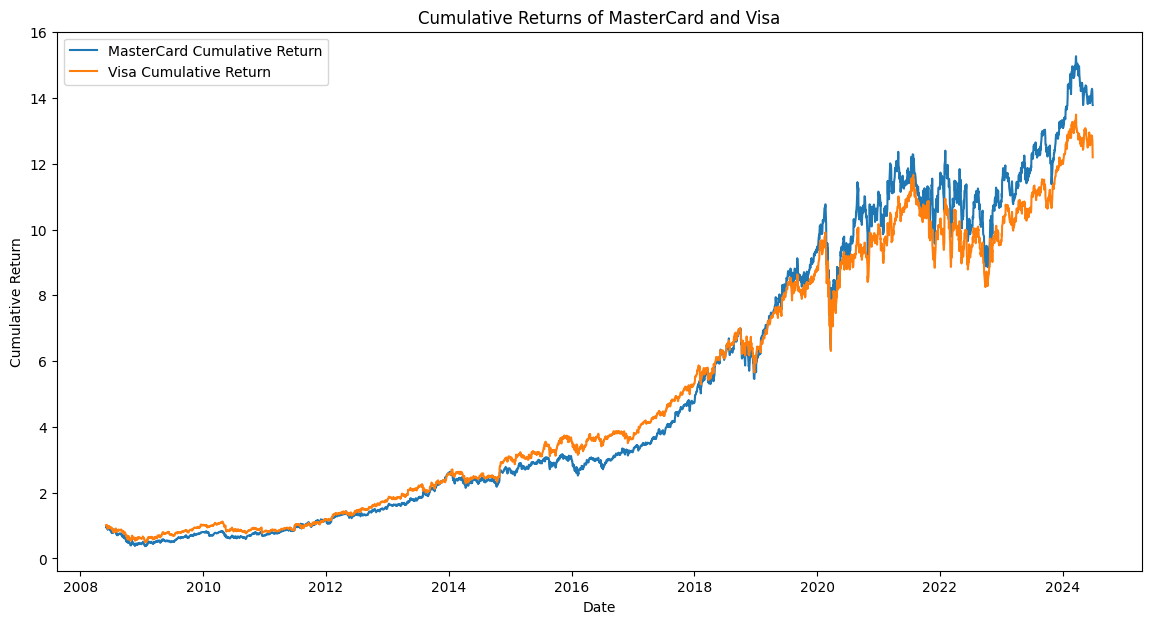

In [ ]:
ii# Calculate daily returns
df['Return_M'] = df['Close_M'].pct_change()
df['Return_V'] = df['Close_V'].pct_change()

# Calculate cumulative returns
df['Cumulative_Return_M'] = (1 + df['Return_M']).cumprod()
df['Cumulative_Return_V'] = (1 + df['Return_V']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Cumulative_Return_M'], label='MasterCard Cumulative Return')
plt.plot(df.index, df['Cumulative_Return_V'], label='Visa Cumulative Return')
plt.title('Cumulative Returns of MasterCard and Visa')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

**Seasonal Decompostion**

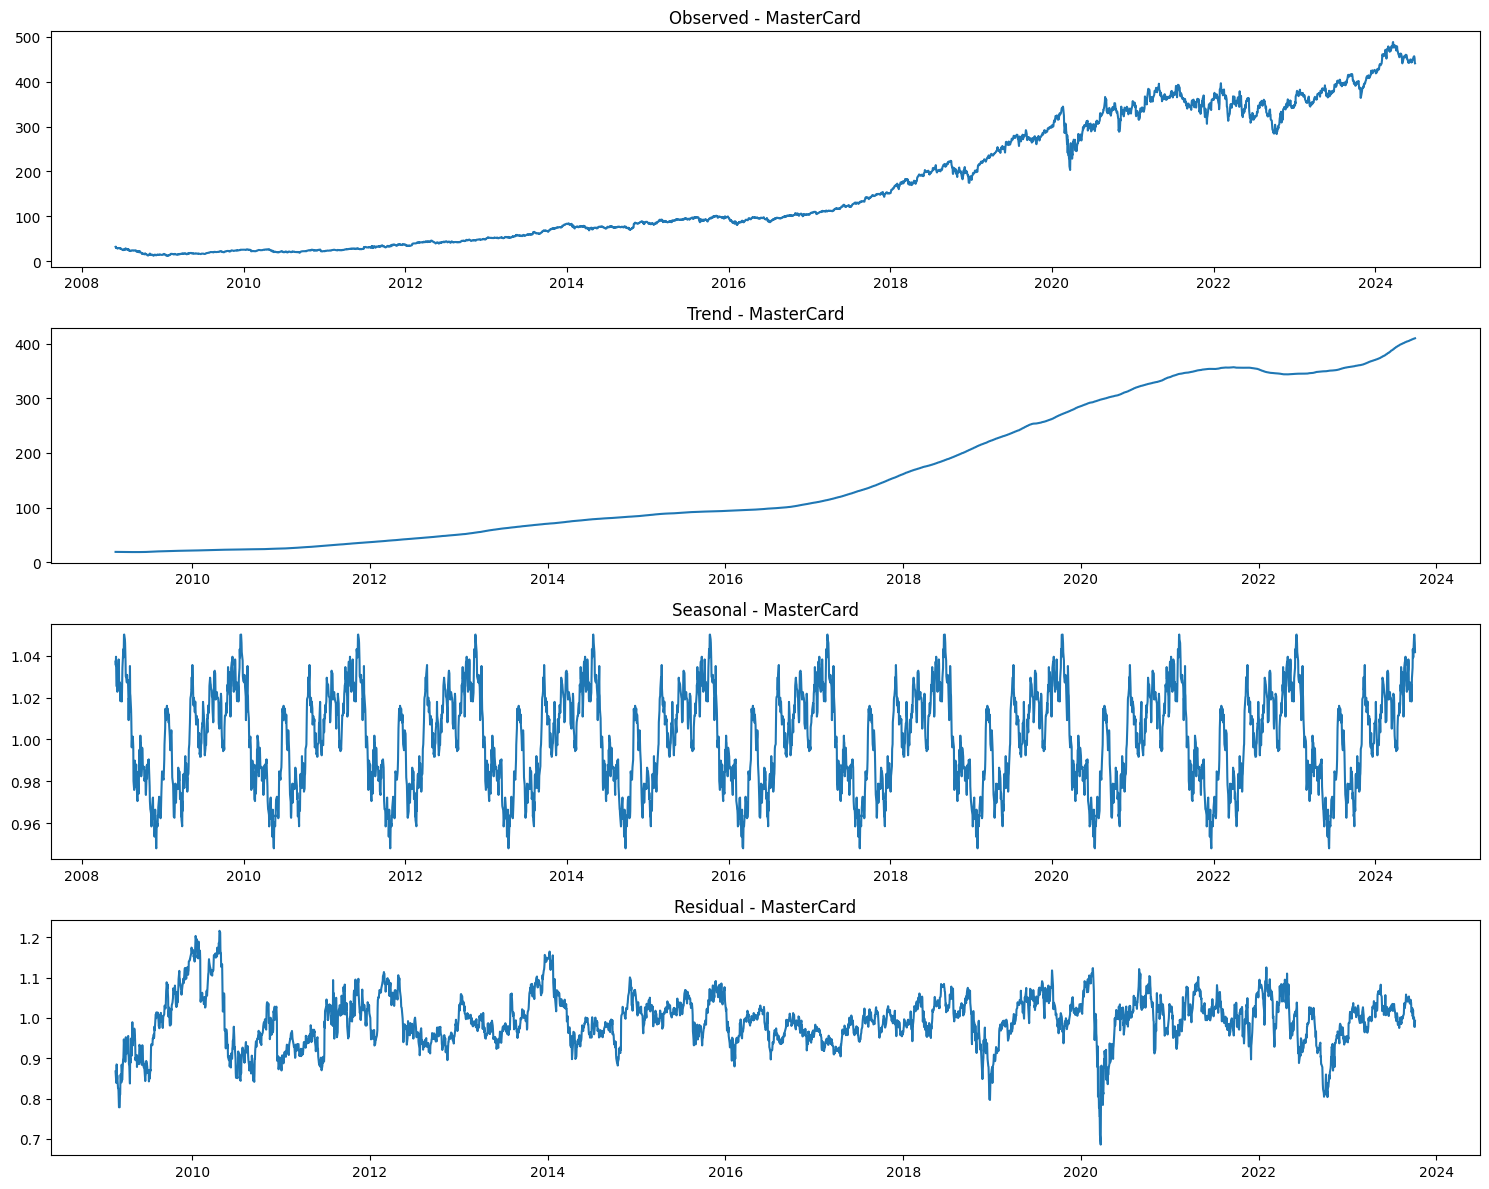

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series for MasterCard
decomposition_M = seasonal_decompose(df['Close_M'], model='multiplicative', period=365)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))

ax1.plot(decomposition_M.observed)
ax1.set_title('Observed - MasterCard')
ax2.plot(decomposition_M.trend)
ax2.set_title('Trend - MasterCard')
ax3.plot(decomposition_M.seasonal)
ax3.set_title('Seasonal - MasterCard')
ax4.plot(decomposition_M.resid)
ax4.set_title('Residual - MasterCard')

plt.tight_layout()
plt.show()

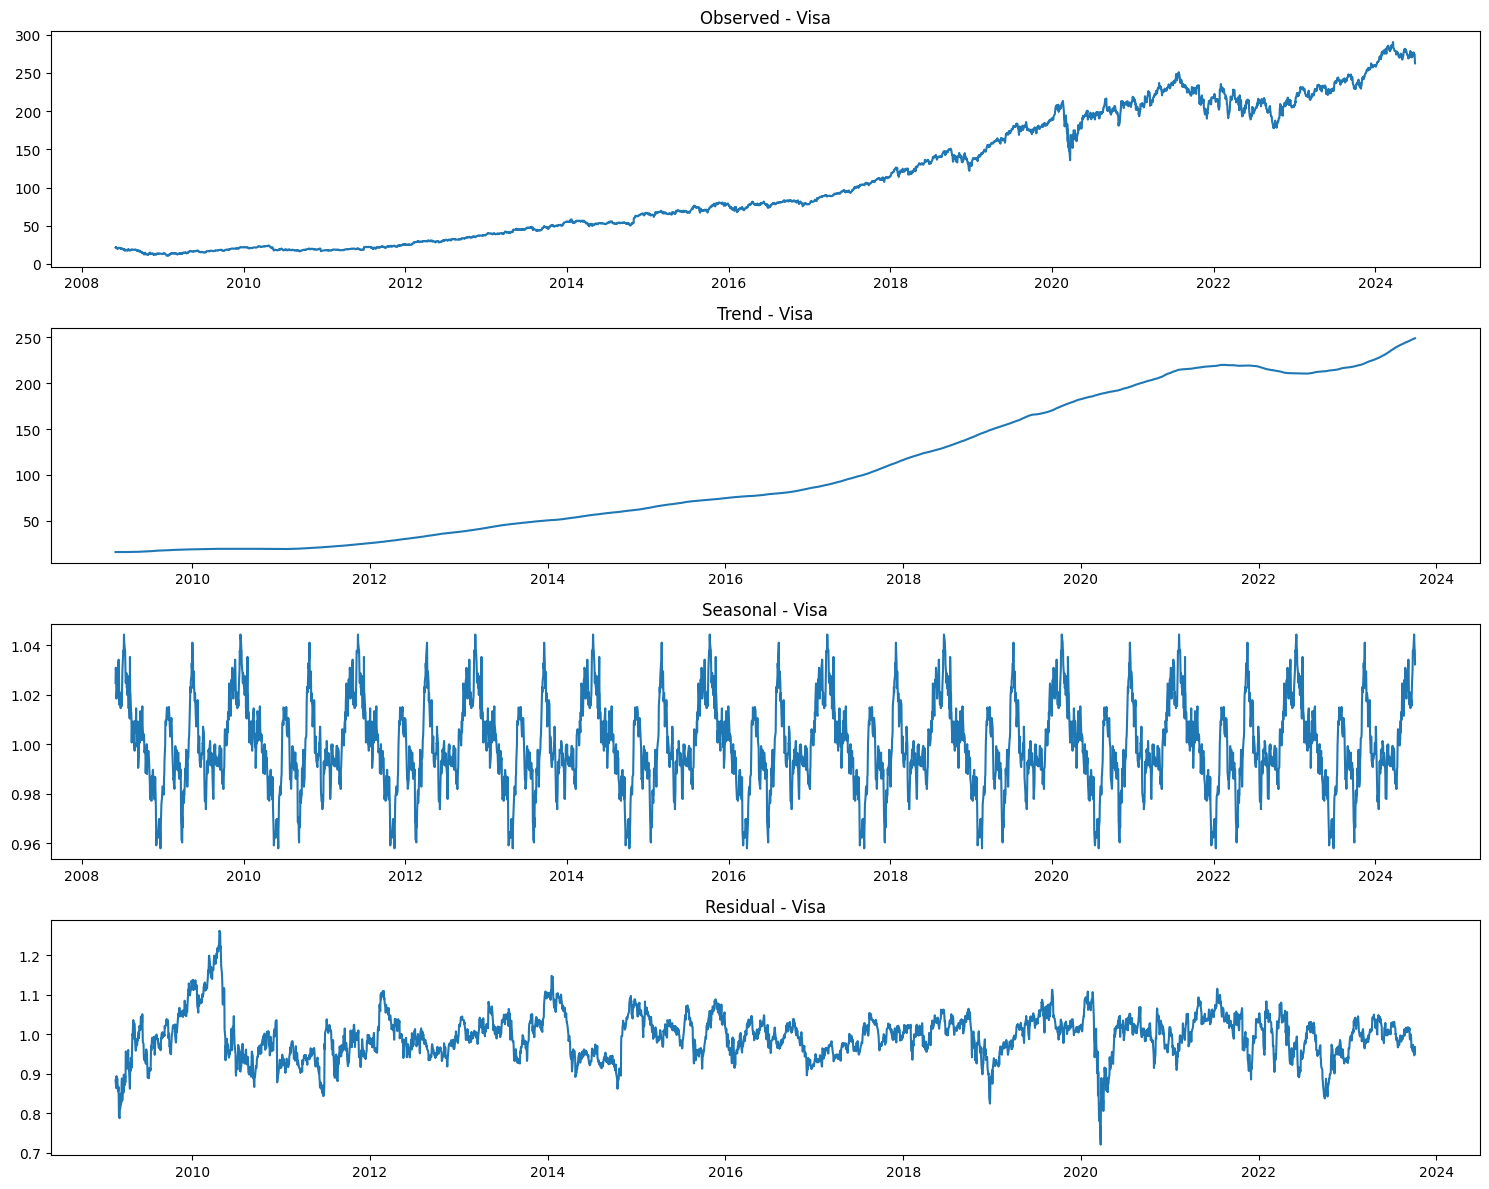

In [ ]:
# Decompose the time series for Visa
decomposition_V = seasonal_decompose(df['Close_V'], model='multiplicative', period=365)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))

ax1.plot(decomposition_V.observed)
ax1.set_title('Observed - Visa')
ax2.plot(decomposition_V.trend)
ax2.set_title('Trend - Visa')
ax3.plot(decomposition_V.seasonal)
ax3.set_title('Seasonal - Visa')
ax4.plot(decomposition_V.resid)
ax4.set_title('Residual - Visa')

plt.tight_layout()
plt.show()

 **Check for stationarity using the Augmented Dickey-Fuller test**

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Check for stationarity using the Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series.dropna())
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')

print("ADF Test for MasterCard Close Price:")
adf_test(df['Close_M'])

print("\nADF Test for Visa Close Price:")
adf_test(df['Close_V'])

ADF Test for MasterCard Close Price:
ADF Statistic: 0.7244490658582785
p-value: 0.9903133735035379
Critial Values:
   1%, -3.4319777314769095
Critial Values:
   5%, -2.862259242714302
Critial Values:
   10%, -2.567152860387119

ADF Test for Visa Close Price:
ADF Statistic: 0.5983093602030786
p-value: 0.9875738835892819
Critial Values:
   1%, -3.431978136745109
Critial Values:
   5%, -2.8622594217404305
Critial Values:
   10%, -2.567152955692979


The ADF test is used to determine whether a time series is stationary, which is a critical assumption for many time series models, including the LSTM model you’re using for stock price prediction.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - loss: 0.0608 - val_loss: 0.1191
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.0141 - val_loss: 0.0658
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 0.0124 - val_loss: 0.0237
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 0.0097 - val_loss: 0.0193
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - loss: 0.0089 - val_loss: 0.0202
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - loss: 0.0079 - val_loss: 0.0191
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0081 - val_loss: 0.0185
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 0.0075 - val_loss: 0.0164
Epoch 9/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - loss: 0.0071 - val_loss: 0.0250
Epoch 10/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - loss: 0.0071 - val_loss: 0.0234
Epoch 11/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.0059 - val_loss: 0.0238
Epoch 12/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - 

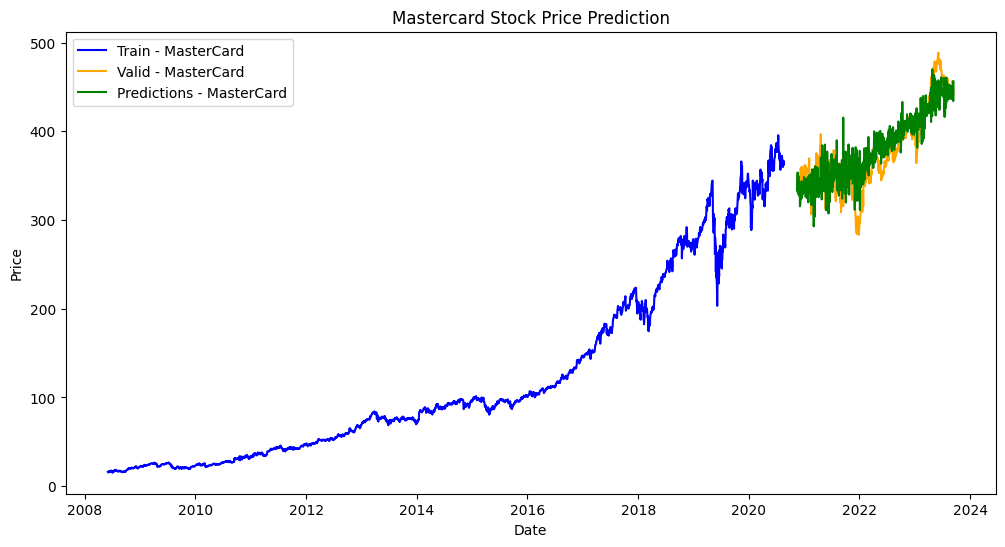

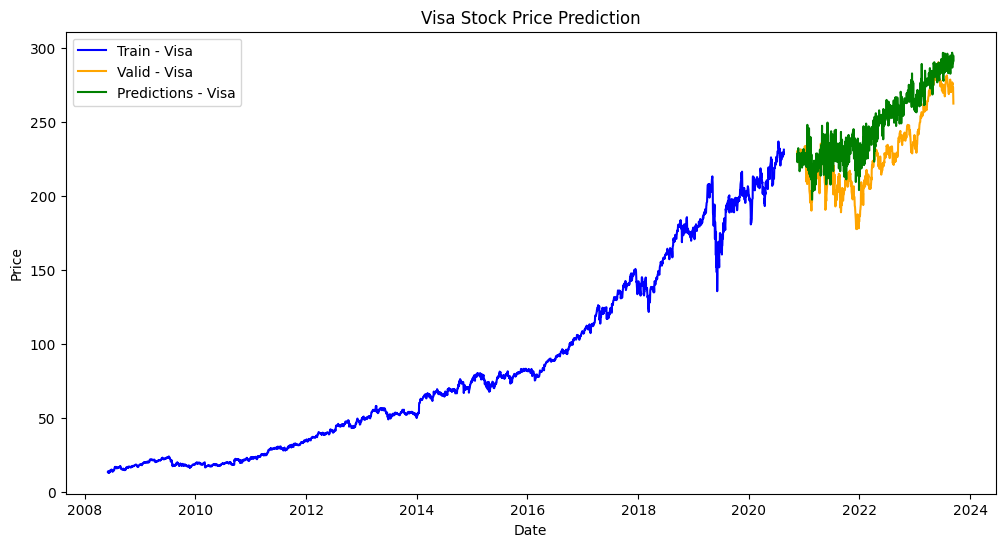

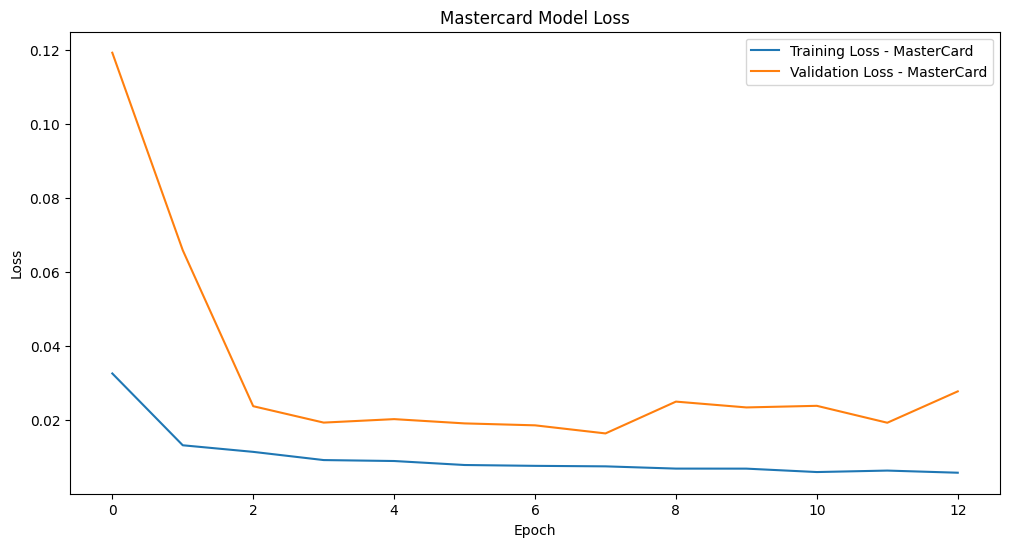

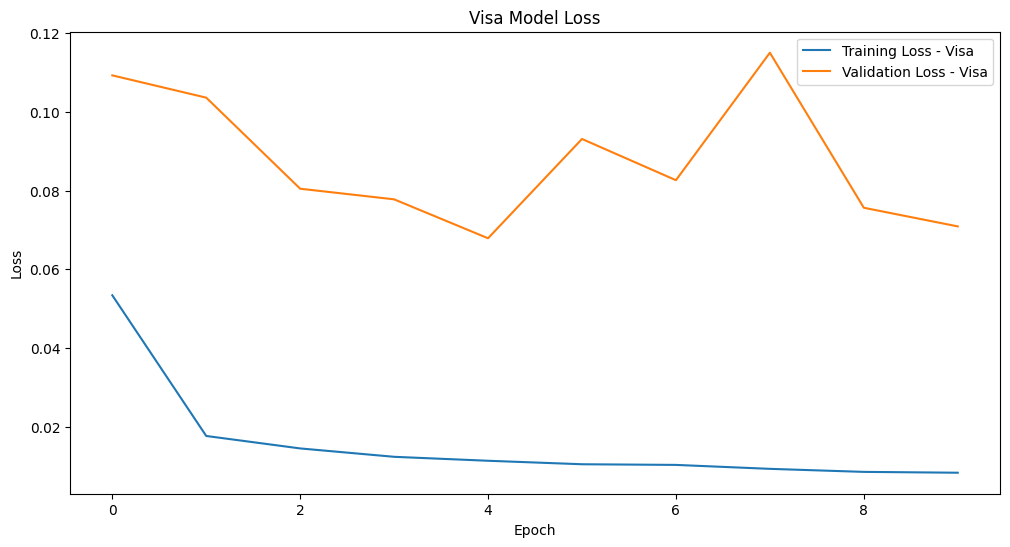

In [ ]:

# Step 1: Feature Selection
features_m = df[['Close_M', 'Volume_M', 'Volatility_M', 'MA_Close_M', 'SMA50_M', 'SMA200_M']].dropna()
features_v = df[['Close_V', 'Volume_V', 'Volatility_V', 'MA_Close_V', 'SMA50_V', 'SMA200_V']].dropna()

# Step 2: Detrend the Data
# Fit a linear trend to the closing prices and subtract it
def detrend_data(prices):
    X = np.arange(len(prices)).reshape(-1, 1)
    y = prices.values
    trend_model = LinearRegression().fit(X, y)
    trend = trend_model.predict(X)
    detrended = y - trend
    return detrended, trend_model

# Detrend Mastercard and Visa prices
train_size_m = int(len(features_m) * 0.8)
train_size_v = int(len(features_v) * 0.8)

train_prices_m, valid_prices_m = features_m['Close_M'][:train_size_m], features_m['Close_M'][train_size_m:]
train_prices_v, valid_prices_v = features_v['Close_V'][:train_size_v], features_v['Close_V'][train_size_v:]

detrended_m, trend_model_m = detrend_data(features_m['Close_M'])
detrended_v, trend_model_v = detrend_data(features_v['Close_V'])

# Step 3: Prepare Features and Target
train_features_m, valid_features_m = features_m[:train_size_m], features_m[train_size_m:]
train_features_v, valid_features_v = features_v[:train_size_v], features_v[train_size_v:]

train_detrended_m, valid_detrended_m = detrended_m[:train_size_m], detrended_m[train_size_m:]
train_detrended_v, valid_detrended_v = detrended_v[:train_size_v], detrended_v[train_size_v:]

# Scale the features
scaler_m = MinMaxScaler()
scaler_v = MinMaxScaler()

scaled_train_features_m = scaler_m.fit_transform(train_features_m)
scaled_valid_features_m = scaler_m.transform(valid_features_m)

scaled_train_features_v = scaler_v.fit_transform(train_features_v)
scaled_valid_features_v = scaler_v.transform(valid_features_v)

# Scale the detrended prices
scaler_detrended_m = MinMaxScaler()
scaler_detrended_v = MinMaxScaler()

scaled_train_detrended_m = scaler_detrended_m.fit_transform(train_detrended_m.reshape(-1, 1))
scaled_valid_detrended_m = scaler_detrended_m.transform(valid_detrended_m.reshape(-1, 1))

scaled_train_detrended_v = scaler_detrended_v.fit_transform(train_detrended_v.reshape(-1, 1))
scaled_valid_detrended_v = scaler_detrended_v.transform(valid_detrended_v.reshape(-1, 1))

# Step 4: Create Sequences for LSTM
def create_sequences(features, target, seq_length):
    X, y = [], []
    for i in range(len(features) - seq_length):
        X.append(features[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # Reduced sequence length to focus on shorter-term patterns

# Mastercard sequences
X_train_m, y_train_m = create_sequences(scaled_train_features_m, scaled_train_detrended_m, seq_length)
X_valid_m, y_valid_m = create_sequences(scaled_valid_features_m, scaled_valid_detrended_m, seq_length)

# Visa sequences
X_train_v, y_train_v = create_sequences(scaled_train_features_v, scaled_train_detrended_v, seq_length)
X_valid_v, y_valid_v = create_sequences(scaled_valid_features_v, scaled_valid_detrended_v, seq_length)

# Step 5: Build and Train the LSTM Model
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.4),  # Increased dropout to prevent overfitting
        LSTM(32),
        Dropout(0.4),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Train model for Mastercard
model_m = build_lstm_model((seq_length, X_train_m.shape[2]))
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_m = model_m.fit(X_train_m, y_train_m, epochs=50, batch_size=32,
                        validation_data=(X_valid_m, y_valid_m), callbacks=[early_stopping], verbose=1)

# Train model for Visa
model_v = build_lstm_model((seq_length, X_train_v.shape[2]))
history_v = model_v.fit(X_train_v, y_train_v, epochs=50, batch_size=32,
                        validation_data=(X_valid_v, y_valid_v), callbacks=[early_stopping], verbose=1)

# Step 6: Make Predictions and Add the Trend Back
# Mastercard predictions
predicted_detrended_m = model_m.predict(X_valid_m)
predicted_detrended_m = scaler_detrended_m.inverse_transform(predicted_detrended_m)

# Add the trend back
future_X_m = np.arange(len(features_m) - len(predicted_detrended_m), len(features_m)).reshape(-1, 1)
trend_m = trend_model_m.predict(future_X_m)
predicted_prices_m = predicted_detrended_m.flatten() + trend_m

# Actual prices for validation period (Mastercard)
actual_prices_m = features_m['Close_M'].iloc[train_size_m + seq_length:].values

# Visa predictions
predicted_detrended_v = model_v.predict(X_valid_v)
predicted_detrended_v = scaler_detrended_v.inverse_transform(predicted_detrended_v)

# Add the trend back
future_X_v = np.arange(len(features_v) - len(predicted_detrended_v), len(features_v)).reshape(-1, 1)
trend_v = trend_model_v.predict(future_X_v)
predicted_prices_v = predicted_detrended_v.flatten() + trend_v

# Actual prices for validation period (Visa)
actual_prices_v = features_v['Close_V'].iloc[train_size_v + seq_length:].values

# Step 7: Add Volatility Adjustment
# Use the volatility feature to add some randomness to the predictions
volatility_m = features_m['Volatility_M'].iloc[train_size_m + seq_length:].values
volatility_v = features_v['Volatility_V'].iloc[train_size_v + seq_length:].values

# Add noise scaled by volatility
np.random.seed(42)
noise_m = np.random.normal(0, volatility_m, size=len(predicted_prices_m))
noise_v = np.random.normal(0, volatility_v, size=len(predicted_prices_v))

predicted_prices_m = predicted_prices_m + noise_m
predicted_prices_v = predicted_prices_v + noise_v

# Step 8: Evaluate the Model
# Mastercard metrics
rmse_m = np.sqrt(mean_squared_error(actual_prices_m, predicted_prices_m))
mae_m = mean_absolute_error(actual_prices_m, predicted_prices_m)
print("Mastercard - RMSE:", rmse_m, "MAE:", mae_m)

# Visa metrics
rmse_v = np.sqrt(mean_squared_error(actual_prices_v, predicted_prices_v))
mae_v = mean_absolute_error(actual_prices_v, predicted_prices_v)
print("Visa - RMSE:", rmse_v, "MAE:", mae_v)

# Mastercard Visualization
plt.figure(figsize=(12, 6))
plt.plot(df.index[:train_size_m], features_m['Close_M'][:train_size_m], label='Train - MasterCard', color='blue')
# Corrected line to select appropriate dates for validation set
plt.plot(df.index[train_size_m + seq_length:train_size_m + seq_length + len(actual_prices_m)], actual_prices_m, label='Valid - MasterCard', color='orange')
plt.plot(df.index[train_size_m + seq_length:train_size_m + seq_length + len(predicted_prices_m)], predicted_prices_m, label='Predictions - MasterCard', color='green')
plt.title('Mastercard Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Visa Visualization
plt.figure(figsize=(12, 6))
plt.plot(df.index[:train_size_v], features_v['Close_V'][:train_size_v], label='Train - Visa', color='blue')
# Corrected line to select appropriate dates for validation set
plt.plot(df.index[train_size_v + seq_length:train_size_v + seq_length + len(actual_prices_v)], actual_prices_v, label='Valid - Visa', color='orange')
plt.plot(df.index[train_size_v + seq_length:train_size_v + seq_length + len(predicted_prices_v)], predicted_prices_v, label='Predictions - Visa', color='green')
plt.title('Visa Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Step 10: Plot Training and Validation Loss
# Mastercard Loss
plt.figure(figsize=(12, 6))
plt.plot(history_m.history['loss'], label='Training Loss - MasterCard')
plt.plot(history_m.history['val_loss'], label='Validation Loss - MasterCard')
plt.title('Mastercard Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visa Loss
plt.figure(figsize=(12, 6))
plt.plot(history_v.history['loss'], label='Training Loss - Visa')
plt.plot(history_v.history['val_loss'], label='Validation Loss - Visa')
plt.title('Visa Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Forecast using ARIMA**

                               SARIMAX Results                                
Dep. Variable:                Close_M   No. Observations:                 3356
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -8122.280
Date:                Fri, 11 Apr 2025   AIC                          16256.560
Time:                        14:27:46   BIC                          16293.269
Sample:                    06-02-2008   HQIC                         16269.689
                         - 04-12-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1403      0.005    -25.550      0.000      -0.151      -0.130
ar.L2          0.0467      0.005      8.708      0.000       0.036       0.057
ar.L3          0.0116      0.006      1.981      0.0

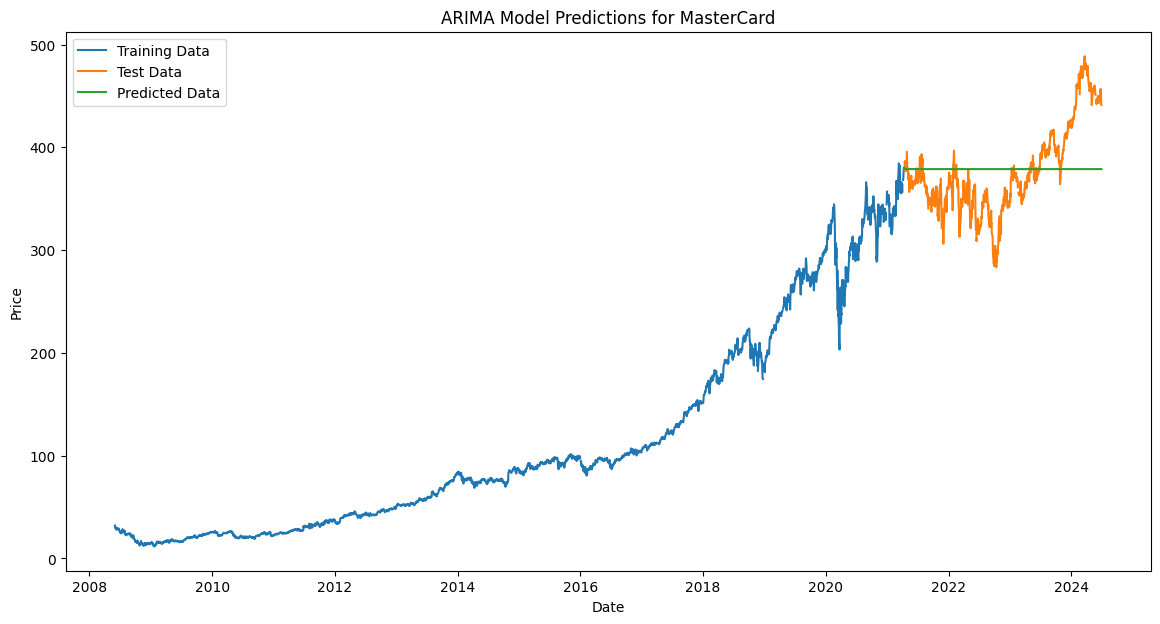

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Ensure the date index has a frequency
df = df.asfreq('B')

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = df['Close_M'][:train_size], data['Close_M'][train_size:]

# Fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

# Make predictions
predictions = model_fit.forecast(steps=len(test))
predictions = pd.Series(predictions, index=test.index)

# Plot the predictions against the actual values for mastercard
plt.figure(figsize=(14, 7))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(predictions, label='Predicted Data')
plt.title('ARIMA Model Predictions for MasterCard')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

                               SARIMAX Results                                
Dep. Variable:                Close_V   No. Observations:                 3356
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6288.184
Date:                Fri, 11 Apr 2025   AIC                          12588.369
Time:                        14:27:16   BIC                          12625.078
Sample:                    06-02-2008   HQIC                         12601.498
                         - 04-12-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1849      0.006    -32.830      0.000      -0.196      -0.174
ar.L2          0.0490      0.006      8.491      0.000       0.038       0.060
ar.L3          0.0138      0.007      2.103      0.0

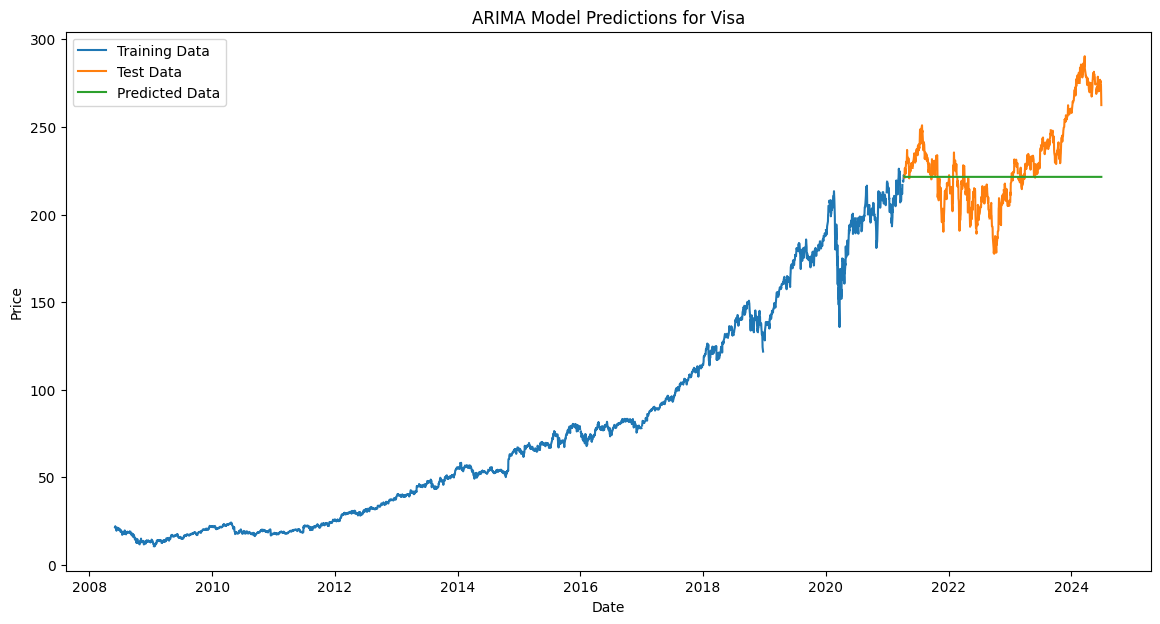

In [ ]:
# Ensure the date index has a frequency
df = df.asfreq('B')

# Split the data into training and testing sets for Visa
train_size = int(len(data) * 0.8)
train_V, test_V = df['Close_V'][:train_size], df['Close_V'][train_size:]

# Fit the ARIMA model for Visa
model_V = ARIMA(train_V, order=(5, 1, 0))
model_fit_V = model_V.fit()
print(model_fit_V.summary())

# Make predictions for Visa
predictions_V = model_fit_V.forecast(steps=len(test_V))
predictions_V = pd.Series(predictions_V, index=test_V.index)

# Plot the predictions against the actual values for Visa
plt.figure(figsize=(14, 7))
plt.plot(train_V, label='Training Data')
plt.plot(test_V, label='Test Data')
plt.plot(predictions_V, label='Predicted Data')
plt.title('ARIMA Model Predictions for Visa')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4195 entries, 2008-06-02 to 2024-06-28
Freq: B
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open_M        4047 non-null   float64
 1   High_M        4047 non-null   float64
 2   Low_M         4047 non-null   float64
 3   Close_M       4047 non-null   float64
 4   Adj Close_M   4047 non-null   float64
 5   Volume_M      4047 non-null   float64
 6   Open_V        4047 non-null   float64
 7   High_V        4047 non-null   float64
 8   Low_V         4047 non-null   float64
 9   Close_V       4047 non-null   float64
 10  Adj Close_V   4047 non-null   float64
 11  Volume_V      4047 non-null   float64
 12  MA_Close_M    4018 non-null   float64
 13  MA_Close_V    4018 non-null   float64
 14  Total Volume  4047 non-null   float64
 15  SMA50_M       3998 non-null   float64
 16  SMA200_M      3848 non-null   float64
 17  SMA50_V       3998 non-null   float64
 18  SM

In [ ]:

# Check correlation between MasterCard and Visa Adjusted Close prices
correlation = df['Adj Close_M'].corr(df['Adj Close_V'])
print(f"Correlation between MasterCard and Visa Adj Close: {correlation:.4f}")

Correlation between MasterCard and Visa Adj Close: 0.9967


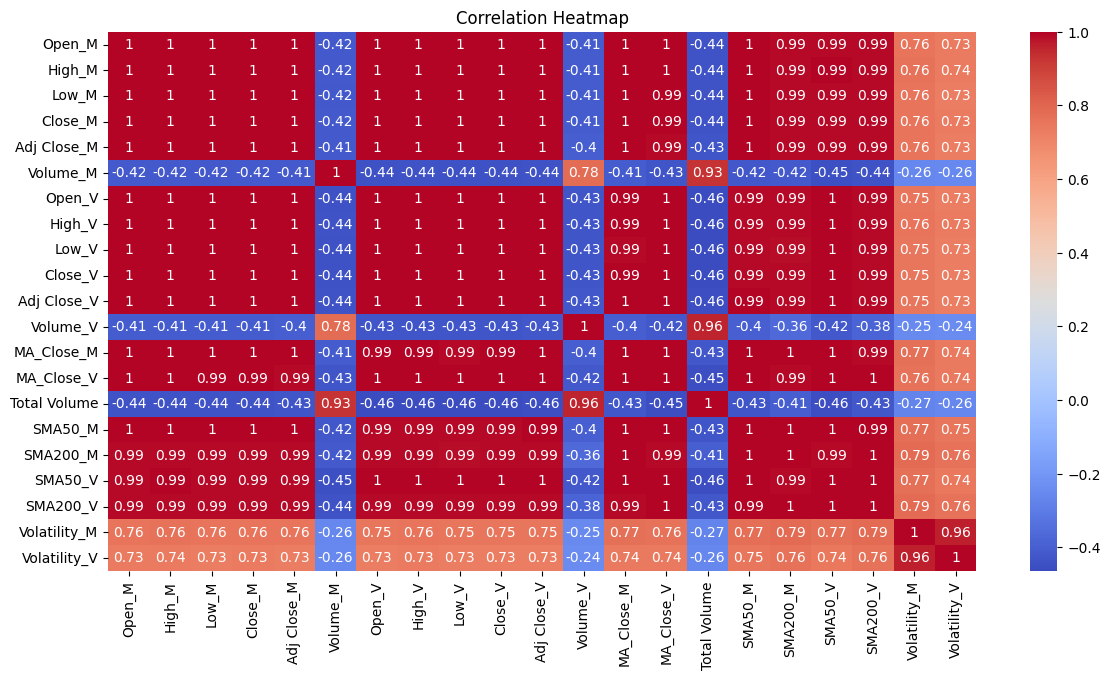

In [ ]:
# EDA: Correlation heatmap
plt.figure(figsize=(14, 7))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()